<a href="https://colab.research.google.com/github/ralbu85/STML/blob/main/STML_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [1]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris(as_frame=True)
df = iris['data']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Data Normalization

In [9]:
df_norm = (df - df.mean())/df.std()

## Clustering

In [10]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3) # creating k-means objects with K=3

In [11]:
kmean.fit(df_norm) # perform clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Examining Clustering Result

In [12]:
kmean.labels_ # cluster labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
kmean.cluster_centers_ # cluster centers

array([[ 1.13217737,  0.08812645,  0.99282844,  1.01412869],
       [-1.01119138,  0.85041372, -1.30063009, -1.25070352],
       [-0.05005221, -0.88042696,  0.34657675,  0.28058731]])

In [15]:
kmean.inertia_ # within-cluster sum of squares (objective function of cluster)

138.88835971735142

## Determine the good number of K

In [17]:
k = [] # empty list for K
inertia = [] # empty list for saving objective function at K
for i in range(1,11): # repeating the following by changing i = 1 to 10
    kmean = KMeans(n_clusters=i) # initialize kmeans with i
    kmean.fit(df_norm) # fit the clustering algorithm
    k.append(i) # put K into k
    inertia.append(kmean.inertia_) # put inertia at K into list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

## Plotting curve

Text(0.5, 1.0, 'K vs Objective Function')

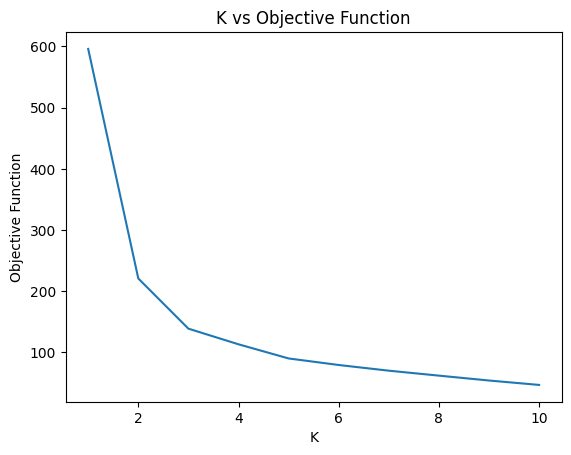

In [18]:
import matplotlib.pyplot as plt

plt.plot(k, inertia)
plt.xlabel('K')
plt.ylabel('Objective Function')
plt.title('K vs Objective Function')

## Prediction for new point

In [22]:
kmean.predict([[0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

## Kmeans with PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # initialize the PCA with only 2 components
pca.fit(df_norm) # fit the PCA
df_pca = pca.transform(df_norm) # apply the PCA

In [25]:
z1 = df_pca[:,0] # first component
z2 = df_pca[:,1] # second component

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PC2')

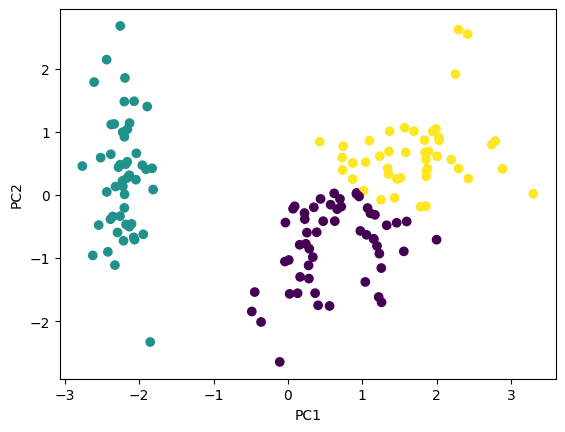

In [30]:
kmean = KMeans(n_clusters=3)
kmean.fit(df_pca)
plt.scatter(z1,z2, c=kmean.labels_) # plotting PCA dimension with K-means result
plt.xlabel('PC1')
plt.ylabel('PC2')


Text(0, 0.5, 'PC2')

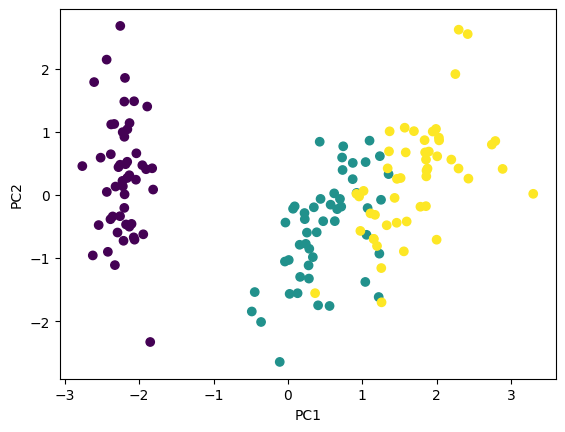

In [31]:
plt.scatter(z1,z2, c=iris['target']) # plotting PCA dimension with K-means result
plt.xlabel('PC1')
plt.ylabel('PC2')